<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Understanding_EWMA_in_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Generate Data:

### 1. Install the Kaggle library

In [22]:
pip install kaggle

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [23]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [24]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [25]:
import kagglehub
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data
!unzip daily-climate-time-series-data.zip



Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  daily-climate-time-series-data.zip
replace DailyDelhiClimateTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [26]:
df = pd.read_csv("DailyDelhiClimateTest.csv")

In [27]:
df=  df[['date','meantemp']]
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


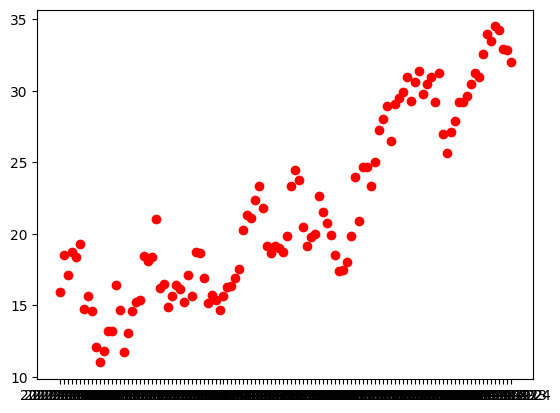

In [28]:
plt.scatter(df['date'],df['meantemp'],color="red")

**Calculating Exponentially Weighted Moving  Average:**

In [29]:
# Creating a function to calculate EWMA:
def ewma(data, alpha):
    if not data:
        return []
    ewma_vals = [data[0]]  # base case
    for x in data[1:]:
        ewma_vals.append(alpha * x + (1 - alpha) * ewma_vals[-1])
    return ewma_vals


In [30]:
X1 = df['meantemp'].ewm(alpha=0.9).mean()

In [31]:
X1

,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


In [32]:
df['ewma'] = X1
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


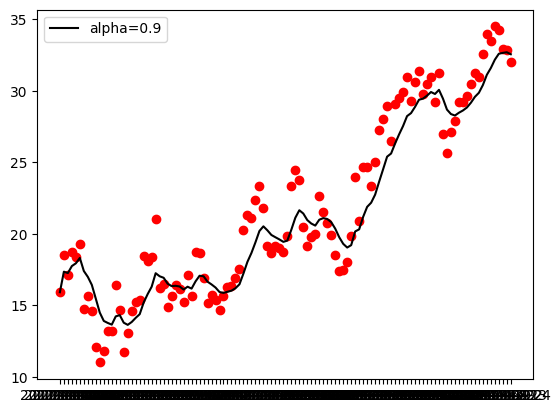

In [44]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.9')
plt.legend()
plt.show()

**For alpha=0.7**


In [45]:
X1 = df['meantemp'].ewm(alpha=0.7).mean()


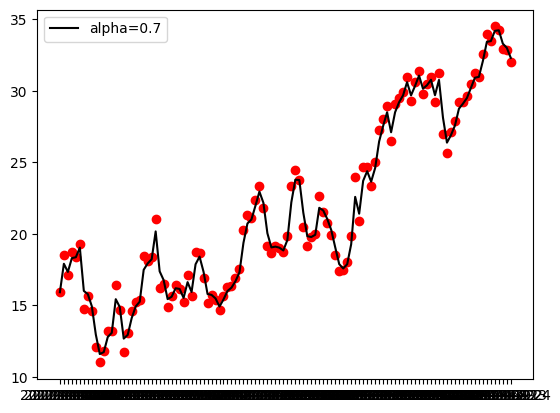

In [46]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.7')
plt.legend()
plt.show()

**For alpha=0.6**


In [47]:
X1 = df['meantemp'].ewm(alpha=0.6).mean()


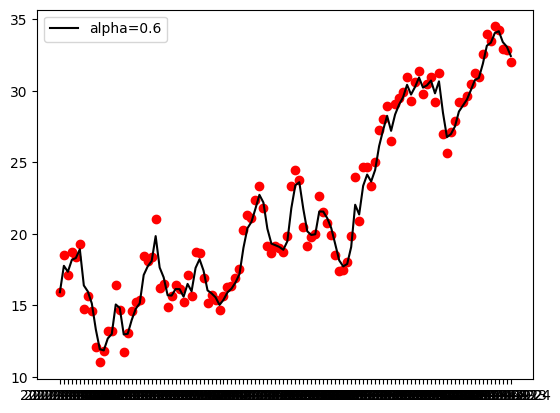

In [48]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.6')
plt.legend()
plt.show()

**For alpha=0.5**


In [49]:
X1 = df['meantemp'].ewm(alpha=0.5).mean()


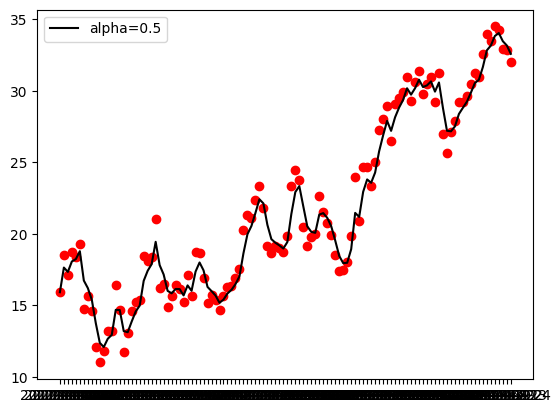

In [50]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.5')
plt.legend()
plt.show()

**For alpha=0.4**


In [51]:
X1 = df['meantemp'].ewm(alpha=0.4).mean()


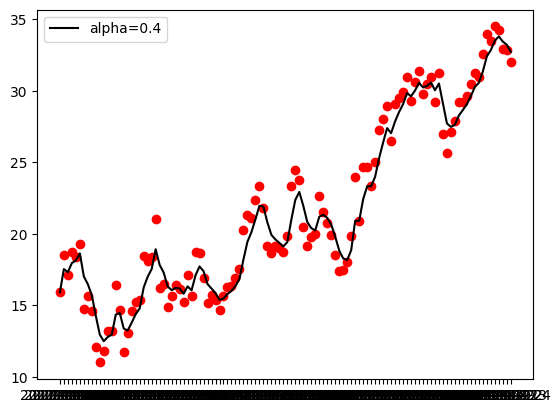

In [52]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.4')
plt.legend()
plt.show()

**For alpha=0.2**


In [53]:
X1 = df['meantemp'].ewm(alpha=0.2).mean()


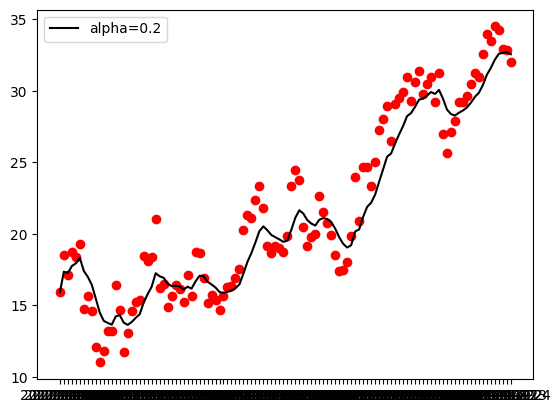

In [54]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],X1,color='black',label='alpha=0.2')
plt.legend()
plt.show()